In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100 
import matplotlib.pyplot as plt
import sys  
import pandas as pd
#sys.path.append("../")  
from pulse_analysis import *

In [2]:
filename = './data/testNoCableTrigger.pcap'

In [8]:
nmbrWin = 512
rep = 2
sweepPositions = 118
df=process_packet_pulseSweep(filename,0,nmbrWin)


1024
ALL PACKETS CONVERTED


In [9]:
df

,0,1
0,212,203
1,214,206
2,212,204
3,213,204
4,215,205
...,...,...
16379,204,205
16380,204,201
16381,202,202
16382,202,202


In [10]:
df=df-200

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f437ad4e278>,
      dtype=object)

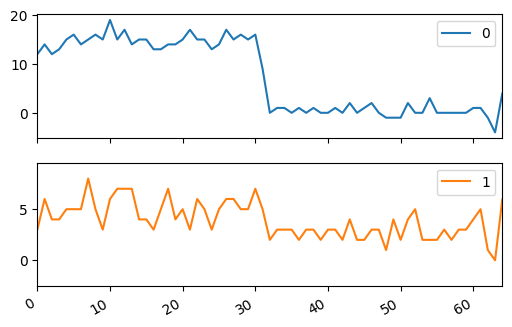

In [13]:
df.plot(subplots=True, xlim=(0,64))
#plt.subplots_adjust( bottom=18, top=31)


Window 8 to 12

TypeError: no numeric data to plot

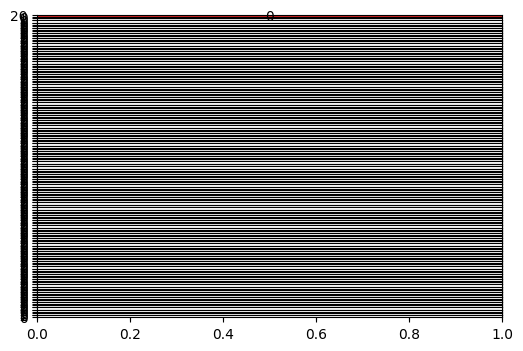

In [7]:
nmbrSamples= 32*nmbrWin
#rep=40pulseSweep_0_511_1w_1rep_0_500_100_osc_5.pcap
fig, axes = plt.subplots(sweepPositions, 1)
for i in range(0,sweepPositions,1):
    df.iloc[:,i*rep:(i+1)*rep].plot(ax=axes[i], xticks=list(range(32*5,32*10,32)), legend=False, sharex=True, xlim=(32*5,32*10) )  
    plt.text(0.5, 0.5, '{}'.format(i), horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
   # axes[i].scatter(df.iloc[:,rep*i:rep*(i+1)].idxmax(),df.iloc[:,rep*i:rep*(i+1)].max(), marker='o', c='k')
#    axes[i].grid()
plt.xlabel('Time[ns]')
plt.ylabel('ADC Counts')
plt.subplots_adjust( bottom=18, top=31)
#plt.savefig('PulseSweep.png')
plt.show()

In [ ]:
df_max= df.max()
df_idxmax=df.idxmax()

In [ ]:
standard = list()
avg = list()
fig3, axes3 = plt.subplots(1, 1)
for l in range(0,sweepPositions,1):
    df_max[l*rep:(l+1)*rep].plot()
    standard.append(df_max[l*rep:(l+1)*rep].std())
    avg.append(df_max[l*rep:(l+1)*rep].mean())
axes3.set(xlabel= 'Number of digitized windows', ylabel='Amplitud [ADC counts]' )

plt.show()

In [ ]:
fig10, axes10 = plt.subplots(sweepPositions, 1)
for l in range(0,sweepPositions,1):
    df_max[l*rep:(l+1)*rep].hist(ax=axes10[l], range=(df_max[l*rep:(l+1)*rep].min(),df_max[l*rep:(l+1)*rep].max()), bins= df_max[l*rep:(l+1)*rep].max()- df_max[l*rep:(l+1)*rep].min())
#    standard.append(df_max[l*rep:(l+1)*rep].std())
#    avg.append(df_max[l*rep:(l+1)*rep].mean())
#axes3.set(xlabel= 'Number of digitized windows', ylabel='Amplitud [ADC counts]' )
plt.subplots_adjust( bottom=10, top=31)

plt.show()

In [ ]:
x =list(range(0,sweepPositions,1))
fig7,axes7 = plt.subplots(1,1)
axes7.errorbar(x,avg, yerr=standard, ecolor='k', capsize=2, lw=3, elinewidth=1)
#axes7.set(xticks=list(range(0,32*5,32)))
axes7.set(xlabel= 'Pulse number', ylabel='Average amplitud [ADC]' ,title='Each point is the average of 100 pulses',xticks=list(range(0,32*5,32)))
plt.grid()
plt.show()

In [ ]:
fig4,axes4 = plt.subplots(1,1)
axes4.plot(standard)
axes4.set(xticks=list(range(0,32*5,32)))
plt.grid()
plt.show()

In [ ]:
fig8,axes8 = plt.subplots(1,1)
axes8.hist(avg)
#axes8.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [ ]:

standardIdx = list()
avg_idx = list()
#fig5, axes5 = plt.subplots(1, 1)
for l in range(0,sweepPositions,1):
  #  df_idxmax[m::256].plot(ax=axes5)
    standardIdx.append(df_idxmax[l*rep:(l+1)*rep].std())
    avg_idx.append(df_idxmax[l*rep:(l+1)*rep].mean())

#plt.show()

In [ ]:
fig10,axes10 = plt.subplots(1,1)
axes10.errorbar(x,avg_idx, yerr=[x*10 for x in standardIdx], ecolor='k', capsize=2, lw=4, elinewidth=1)
#axes10.set(xticks=list(range(0,32*5,32)))
axes10.set(xlabel= 'Pulse number', ylabel='Average sample number of max ampl')
plt.grid()
plt.show()

In [ ]:
fig6,axes6 = plt.subplots(1,1)
axes6.plot(standardIdx)
#axes6.set(xticks=list(range(0,32*4,32)))
plt.grid()
plt.show()

In [ ]:
fig7,axes7 = plt.subplots(1,1)
axes7.hist(standardIdx)
axes7.set(xlabel='std (sample number of max ampl)')

#axes6.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [ ]:
np.std(standardIdx[0:55])

In [ ]:
fig7,axes7 = plt.subplots(1,1)
axes7.hist(standardIdx[64:128])
#axes6.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [ ]:
np.std(standardIdx[56:128])